In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm




In [ ]:
# Load the dataset
df = pd.read_csv('Energy_ENB2012_data.csv')
df



,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
# Display basic information
print("Dataset Overview:")
print(df.info())
print(df.head())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Compactness          768 non-null    float64
 1   SurfaceArea          768 non-null    float64
 2   WallArea             768 non-null    float64
 3   RoofArea             768 non-null    float64
 4   Height               768 non-null    float64
 5   Orientation          768 non-null    int64  
 6   WindowsArea          768 non-null    float64
 7   WindowsDistribution  768 non-null    int64  
 8   HeatingLoad          768 non-null    float64
 9   CoolingLoad          768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
   Compactness  SurfaceArea  WallArea  RoofArea  Height  Orientation  \
0         0.98        514.5     294.0    110.25     7.0            2   
1         0.98        514.5     294.0    110.25     7.0            3   
2    

In [ ]:

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Compactness            0
SurfaceArea            0
WallArea               0
RoofArea               0
Height                 0
Orientation            0
WindowsArea            0
WindowsDistribution    0
HeatingLoad            0
CoolingLoad            0
dtype: int64


In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())




Descriptive Statistics:
       Compactness  SurfaceArea    WallArea    RoofArea     Height  \
count   768.000000   768.000000  768.000000  768.000000  768.00000   
mean      0.764167   671.708333  318.500000  176.604167    5.25000   
std       0.105777    88.086116   43.626481   45.165950    1.75114   
min       0.620000   514.500000  245.000000  110.250000    3.50000   
25%       0.682500   606.375000  294.000000  140.875000    3.50000   
50%       0.750000   673.750000  318.500000  183.750000    5.25000   
75%       0.830000   741.125000  343.000000  220.500000    7.00000   
max       0.980000   808.500000  416.500000  220.500000    7.00000   

       Orientation  WindowsArea  WindowsDistribution  HeatingLoad  CoolingLoad  
count   768.000000   768.000000            768.00000   768.000000   768.000000  
mean      3.500000     0.234375              2.81250    22.307201    24.587760  
std       1.118763     0.133221              1.55096    10.090196     9.513306  
min       2.000000  

In [ ]:
# Central Tendency Measures
print("\nMeasures of Central Tendency:")
for column in df.select_dtypes(include=[np.number]).columns:
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode()[0]
    print(f"{column} - Mean: {mean_value:.2f}, Median: {median_value:.2f}, Mode: {mode_value:.2f}")




Measures of Central Tendency:
Compactness - Mean: 0.76, Median: 0.75, Mode: 0.62
SurfaceArea - Mean: 671.71, Median: 673.75, Mode: 514.50
WallArea - Mean: 318.50, Median: 318.50, Mode: 294.00
RoofArea - Mean: 176.60, Median: 183.75, Mode: 220.50
Height - Mean: 5.25, Median: 5.25, Mode: 3.50
Orientation - Mean: 3.50, Median: 3.50, Mode: 2.00
WindowsArea - Mean: 0.23, Median: 0.25, Mode: 0.10
WindowsDistribution - Mean: 2.81, Median: 3.00, Mode: 1.00
HeatingLoad - Mean: 22.31, Median: 18.95, Mode: 15.16
CoolingLoad - Mean: 24.59, Median: 22.08, Mode: 14.27


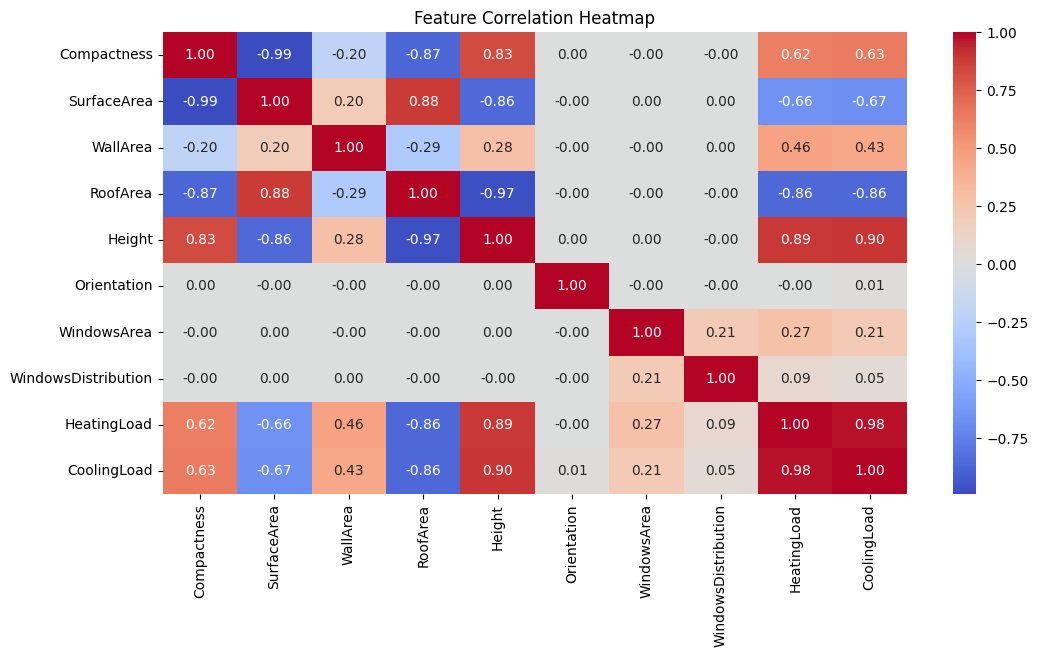

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()





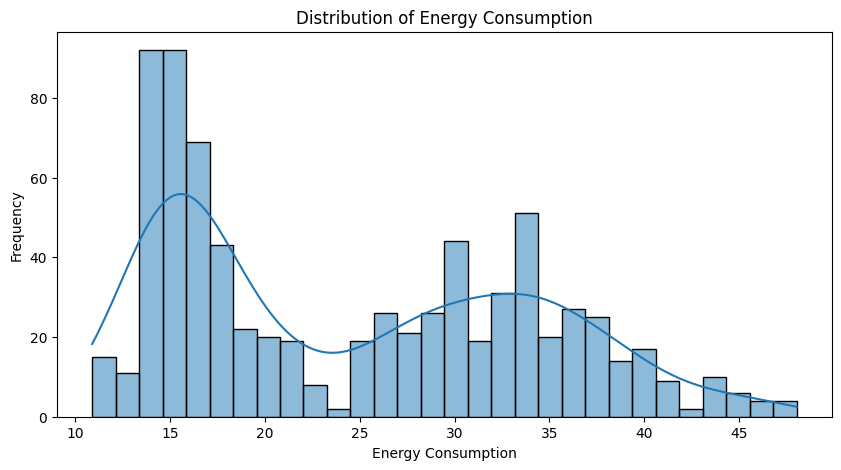

In [ ]:
# Histogram of Energy Consumption
plt.figure(figsize=(10, 5))
sns.histplot(df.iloc[:, -1], kde=True, bins=30)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

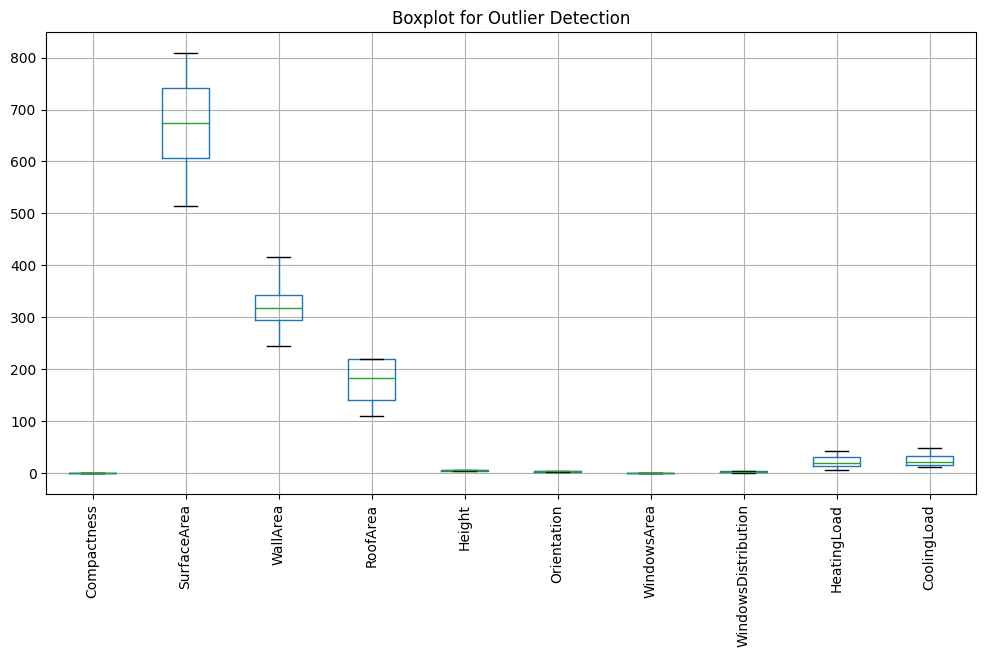

In [ ]:
# Identifying Outliers using Boxplots
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title('Boxplot for Outlier Detection')
plt.show()



In [ ]:
# Regression Analysis

X = df.iloc[:, :-2]  # Independent variables (excluding energy targets)
y = df.iloc[:, -2]   # Dependent variable (energy heating load)
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        04:21:53   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  84.0145    

In [ ]:
# Feature Importance using Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df.iloc[:, :-2]
y = df.iloc[:, -2]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)




Feature Importance:
SurfaceArea            0.356170
RoofArea               0.333762
Compactness            0.115256
WindowsArea            0.076154
Height                 0.071224
WallArea               0.033839
WindowsDistribution    0.012855
Orientation            0.000740
dtype: float64


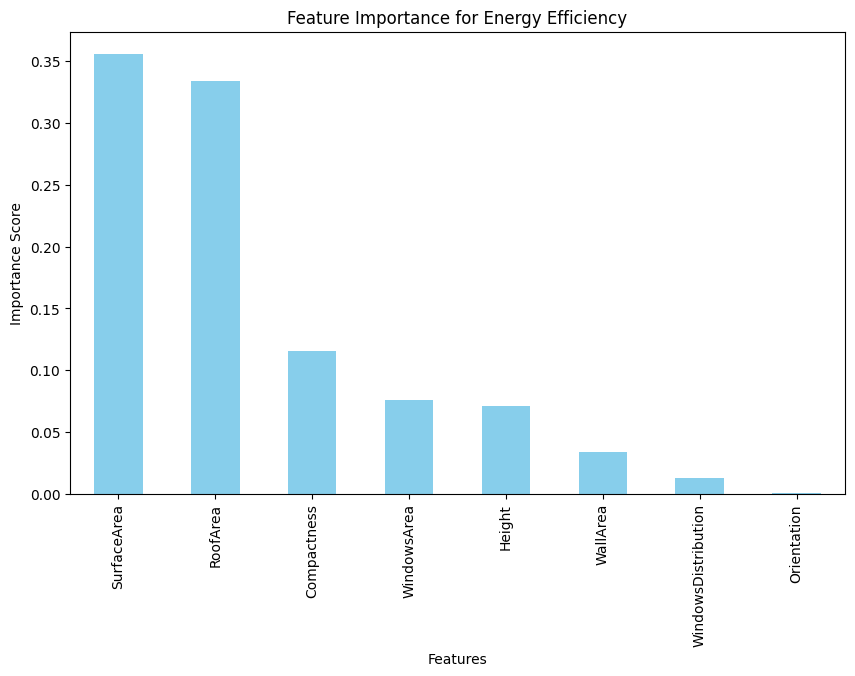

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Energy Efficiency')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()



In [ ]:

# Optimization Proposal
improvement_suggestions = {
    "Compactness": "Increase compactness to reduce heat loss.",
    "Wall Area": "Optimize insulation material to reduce energy leakage.",
    "Roof Area": "Implement energy-reflective roofing.",
    "Glazing Area": "Use triple-glazed windows for better insulation."
}


In [ ]:
print("\nDesign Improvement Suggestions:")
for key, value in improvement_suggestions.items():
    print(f"- {key}: {value}")



Design Improvement Suggestions:
- Compactness: Increase compactness to reduce heat loss.
- Wall Area: Optimize insulation material to reduce energy leakage.
- Roof Area: Implement energy-reflective roofing.
- Glazing Area: Use triple-glazed windows for better insulation.
